<a href="https://colab.research.google.com/github/manishverma0822/statistics-python/blob/main/notebooks/Categorical_proportions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Categorical proportions & barplots (E)**
Dataset: Penguins size data – GitHub (penguins_size.csv):
https://github.com/allisonhorst/palmerpenguins/tree/master/inst/extdata

Task:

1. Compute frequency and relative frequency tables for species and island.

2. Compute conditional proportion of species within each island (e.g., P(species | island)).

3. Plot bar charts for marginal and conditional distributions; comment on any obvious
dependence between species and island.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://raw.githubusercontent.com/dataprofessor/data/master/penguins_size.csv"
df = pd.read_csv(url)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [2]:
print(df.species.value_counts())

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


In [3]:
print(df.island.value_counts())

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64


In [4]:
pd.crosstab(df.species,df.island)

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44,56,52
Chinstrap,0,68,0
Gentoo,124,0,0


In [5]:
prob_Adelie_given_Biscoe =  len(df[(df.island == "Biscoe") & (df.species == "Adelie")]) / len(df[df["island"]=='Biscoe'])
prob_Chinstrap_given_Biscoe =  len(df[(df.island == "Biscoe") & (df.species == "Chinstrap")]) / len(df[df["island"]=='Biscoe'])
prob_Gentoo_given_Biscoe =  len(df[(df.island == "Biscoe") & (df.species == "Gentoo")]) / len(df[df["island"]=='Biscoe'])

prob_Adelie_given_Dream =  len(df[(df.island == "Dream") & (df.species == "Adelie")]) / len(df[df["island"]=='Dream'])
prob_Chinstrap_given_Dream =  len(df[(df.island == "Dream") & (df.species == "Chinstrap")]) / len(df[df["island"]=='Dream'])
prob_Gentoo_given_Dream =  len(df[(df.island == "Dream") & (df.species == "Gentoo")]) / len(df[df["island"]=='Dream'])

prob_Adelie_given_Torgersen =  len(df[(df.island == "Torgersen") & (df.species == "Adelie")]) / len(df[df["island"]=='Torgersen'])
prob_Chinstrap_given_Torgersen =  len(df[(df.island == "Torgersen") & (df.species == "Chinstrap")]) / len(df[df["island"]=='Torgersen'])
prob_Gentoo_given_Torgersen =  len(df[(df.island == "Torgersen") & (df.species == "Gentoo")]) / len(df[df["island"]=='Torgersen'])

In [6]:
print('P(Adelie|Biscoe)',prob_Adelie_given_Biscoe)
print('P(Chinstrap|Biscoe)',prob_Chinstrap_given_Biscoe)
print('P(Gentoo|Biscoe)',prob_Gentoo_given_Biscoe)

print('P(Adelie|Dream)',prob_Adelie_given_Dream)
print('P(Chinstrap|Dream)',prob_Chinstrap_given_Dream)
print('P(Gentoo|Dream)',prob_Gentoo_given_Dream)

print('P(Adelie|Torgersen)',prob_Adelie_given_Torgersen)
print('P(Chinstrap|Torgersen)',prob_Chinstrap_given_Torgersen)
print('P(Gentoo|Torgersen)',prob_Gentoo_given_Torgersen)

pd.crosstab(df.species,df.island,normalize='columns')

P(Adelie|Biscoe) 0.2619047619047619
P(Chinstrap|Biscoe) 0.0
P(Gentoo|Biscoe) 0.7380952380952381
P(Adelie|Dream) 0.45161290322580644
P(Chinstrap|Dream) 0.5483870967741935
P(Gentoo|Dream) 0.0
P(Adelie|Torgersen) 1.0
P(Chinstrap|Torgersen) 0.0
P(Gentoo|Torgersen) 0.0


island,Biscoe,Dream,Torgersen
species,,,
Adelie,0.261905,0.451613,1.0
Chinstrap,0.000000,0.548387,0.0
Gentoo,0.738095,0.000000,0.0


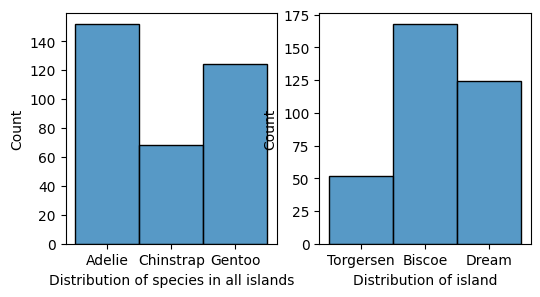

In [7]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
sns.histplot(df.species)
plt.xlabel('Distribution of species in all islands')

plt.subplot(1,2,2)
sns.histplot(df.island)
plt.xlabel('Distribution of island')
plt.show()

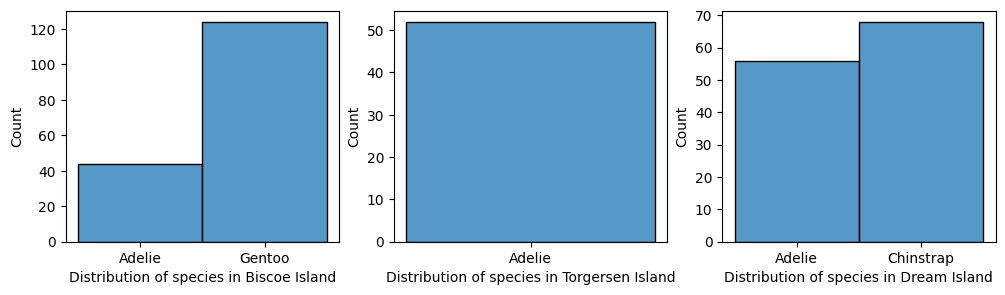

In [10]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.histplot(df[(df.island == "Biscoe")].species)
plt.xlabel('Distribution of species in Biscoe Island')

plt.subplot(1,3,2)
sns.histplot(df[(df.island == "Torgersen")].species)
plt.xlabel('Distribution of species in Torgersen Island')

plt.subplot(1,3,3)
sns.histplot(df[(df.island == "Dream")].species)
plt.xlabel('Distribution of species in Dream Island')
plt.show()

Observations:
1. Torgersen Island has only 1 species : Adelie.
2. Chinstrap species is only found on Dream Island.
3. Gentoo species in only found on Biscoe Island.
4. Adelie is the most common species found in all islands.